## Step -1 Importing data



In [1]:
import pandas as pd

In [2]:
dataorig = pd.read_csv('../data/ChronicKidneyDiseaseData - OriginalData.csv')
import matplotlib.pyplot as plt
import seaborn as sns
dataorig = pd.DataFrame(data=dataorig).replace('yes',True)


In [3]:
data = pd.read_csv('../data/Chronic Kidney Disease Data - Feature Selected & Cleaned MICE (Original).csv', header='infer')
df=pd.DataFrame(data)

In [4]:
df.head(10)

,classification,hemo,sc,pcv,al,rc,htn,sg,dm,sod
0,ckd,15.4,1.2,44.0,1.0,5.200000,yes,1.02,yes,146.657867
1,ckd,11.3,0.8,38.0,4.0,4.686921,no,1.02,no,151.385254
2,ckd,9.6,1.8,31.0,2.0,4.114644,no,1.01,yes,130.725586
3,ckd,11.2,3.8,32.0,4.0,3.900000,yes,1.01,no,111.000000
4,ckd,11.6,1.4,35.0,2.0,4.600000,no,1.01,no,137.998795
5,ckd,12.2,1.1,39.0,3.0,4.400000,yes,1.02,yes,142.000000
6,ckd,12.4,24.0,36.0,0.0,4.188086,no,1.01,no,104.000000
7,ckd,12.4,1.1,44.0,2.0,5.000000,no,1.02,yes,146.358780
8,ckd,10.8,1.9,33.0,3.0,4.000000,yes,1.02,yes,140.041412
9,ckd,9.5,7.2,29.0,2.0,3.700000,yes,1.02,yes,114.000000


In [5]:
df.replace('yes',True)

,classification,hemo,sc,pcv,al,rc,htn,sg,dm,sod
0,ckd,15.4,1.2,44.0,1.0,5.200000,True,1.02,True,146.657867
1,ckd,11.3,0.8,38.0,4.0,4.686921,no,1.02,no,151.385254
2,ckd,9.6,1.8,31.0,2.0,4.114644,no,1.01,True,130.725586
3,ckd,11.2,3.8,32.0,4.0,3.900000,True,1.01,no,111.000000
4,ckd,11.6,1.4,35.0,2.0,4.600000,no,1.01,no,137.998795
...,...,...,...,...,...,...,...,...,...,...
395,notckd,15.7,0.5,47.0,0.0,4.900000,no,1.02,no,150.000000
396,notckd,16.5,1.2,54.0,0.0,6.200000,no,1.03,no,141.000000
397,notckd,15.8,0.6,49.0,0.0,5.400000,no,1.02,no,137.000000
398,notckd,14.2,1.0,51.0,0.0,5.900000,no,1.03,no,135.000000


## Step - 2 Data Cleaning

First we will encode the category columns based on our own schema, and convert classes into numeric type which is recognisable. We will also remove any NaNs (missing values) from the data. We will be doing this all using the *Pandas library*.

In [6]:
#cleaning the data - replacing yes with 1 and no with 0 in pandas dataframe
df['htn'] = df['htn'].replace('yes',True) #htn column
df['htn'] = df['htn'].replace('no',False)  #htn coloumn
df['dm'] = df['dm'].replace('yes',True)   #dm column
df['dm'] = df['dm'].replace('no',False)    #dm column

df['classification'] = df['classification'].replace('ckd',True)  #ckd = True
df['classification'] = df['classification'].replace('notckd',False)  #notckd = False
df = df.fillna(0) #removing any NaNs
#seeing the cleaned data
df

C:\Users\nairn\AppData\Local\Temp\ipykernel_15908\632612943.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['classification'] = df['classification'].replace('notckd',False)  #notckd = False


,classification,hemo,sc,pcv,al,rc,htn,sg,dm,sod
0,True,15.4,1.2,44.0,1.0,5.200000,True,1.02,True,146.657867
1,True,11.3,0.8,38.0,4.0,4.686921,False,1.02,False,151.385254
2,True,9.6,1.8,31.0,2.0,4.114644,False,1.01,True,130.725586
3,True,11.2,3.8,32.0,4.0,3.900000,True,1.01,False,111.000000
4,True,11.6,1.4,35.0,2.0,4.600000,False,1.01,False,137.998795
...,...,...,...,...,...,...,...,...,...,...
395,False,15.7,0.5,47.0,0.0,4.900000,False,1.02,False,150.000000
396,False,16.5,1.2,54.0,0.0,6.200000,False,1.03,False,141.000000
397,False,15.8,0.6,49.0,0.0,5.400000,False,1.02,False,137.000000
398,False,14.2,1.0,51.0,0.0,5.900000,False,1.03,False,135.000000


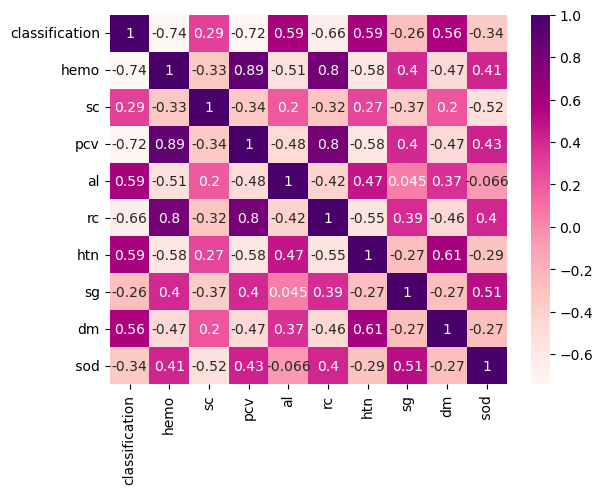

In [7]:
import seaborn as sb
#sns.pairplot(df,hue="classification")
plt.figure()
sns.heatmap(df.corr(), annot = True, cmap='RdPu') 
plt.show()

In [8]:
import numpy as np

Now, let us import some basic dependencies for creatinng and training our model using PyTorch and evaluate and serialize deta using sklearn.

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch import from_numpy as totensor

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

The **classification** column is the target for our model, and so shall we change into a category and encode it to numeric classes.

In [10]:
df['classification'] = df['classification'].astype('category')
encode_map = {
    'ckd': 1,
    'notckd': 0
}

df['classification'].replace(encode_map, inplace=True)

C:\Users\nairn\AppData\Local\Temp\ipykernel_15908\3015836191.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['classification'].replace(encode_map, inplace=True)


In [11]:
X = df.iloc[:, 1:10]
y = df.iloc[:, 0:1]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=70)
#splitting the test data and train data randomly from the input. Train data = 70% of all samples.

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [13]:
#Now let us define the parameters of our training
EPOCHS = 150
BATCH_SIZE = 32
LEARNING_RATE = 0.0001

In [14]:
## First we wll convert them into numpy array and then into PyTorch Tensors
xx,yy=np.array(X_train, dtype='float32'),np.array(Y_train, dtype='float32')

In [15]:
## train data
class CustomDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)

xx,yy = torch.FloatTensor(xx), torch.FloatTensor(yy)
train_data = CustomDataset(xx,yy)
## test data    
class testData(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
    def __len__ (self):
        return len(self.X_data)

test_data = CustomDataset(torch.FloatTensor(X_test), torch.FloatTensor(np.array(Y_test, dtype='float32')))

Let us now use the data loader which we created in the previous block.

In [16]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1)

Here, we are defining the architecture of our model. We are going to have a 9-(32-32)-1 Neural network with 2 batch normalization, a drouput layer and relu as the activation function.

In [17]:
class Perceptron(torch.nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.layer_1 = nn.Linear(9, 32) 
        self.layer_2 = nn.Linear(32, 32)
        self.layer_out = nn.Linear(32, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(32)
        self.batchnorm2 = nn.BatchNorm1d(32)
    def forward(self, x):
        x = self.relu(self.layer_1(x))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        return x

In [18]:
model = Perceptron()
print(model)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

Perceptron(
  (layer_1): Linear(in_features=9, out_features=32, bias=True)
  (layer_2): Linear(in_features=32, out_features=32, bias=True)
  (layer_out): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [19]:
## Now let us define the accuracy calculation function
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

## Step 3 Model Training
Now we will turn into the train mode, and train the model.

First we will store the loss and accuracy over each epoch in a list.

In [20]:
losslist,acclist= [0],[0]

In [21]:
model.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch)
        acc = binary_acc(y_pred, y_batch)
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    print('Epoch {}: | Loss: {}:'.format(e+0,epoch_loss/len(train_loader)))
    print('Acc: {}'.format(epoch_acc/len(train_loader)))
    losslist.append(epoch_loss/len(train_loader))
    acclist.append(epoch_acc/len(train_loader))

Epoch 1: | Loss: 0.642341865433587:
Acc: 64.44444444444444
Epoch 2: | Loss: 0.6022996372646756:
Acc: 72.77777777777777
Epoch 3: | Loss: 0.5793568425708346:
Acc: 81.66666666666667
Epoch 4: | Loss: 0.5718165735403696:
Acc: 77.55555555555556
Epoch 5: | Loss: 0.5250045392248366:
Acc: 84.55555555555556
Epoch 6: | Loss: 0.5020914839373695:
Acc: 89.66666666666667
Epoch 7: | Loss: 0.48554565178023446:
Acc: 90.44444444444444
Epoch 8: | Loss: 0.4754861758814918:
Acc: 92.11111111111111
Epoch 9: | Loss: 0.4443335301346249:
Acc: 92.66666666666667
Epoch 10: | Loss: 0.4322739607757992:
Acc: 91.77777777777777
Epoch 11: | Loss: 0.4033574064572652:
Acc: 95.33333333333333
Epoch 12: | Loss: 0.4129459824826982:
Acc: 94.44444444444444
Epoch 13: | Loss: 0.38035033146540326:
Acc: 94.55555555555556
Epoch 14: | Loss: 0.3713199562496609:
Acc: 95.11111111111111
Epoch 15: | Loss: 0.3507075077957577:
Acc: 95.11111111111111
Epoch 16: | Loss: 0.33825170000394184:
Acc: 96.33333333333333
Epoch 17: | Loss: 0.35201206472

We can see that the loss has reduced repeatedly and the train accuracy booming to 99.6% Now we will test the model over a test data. Let us now visualize the loss and accuracy data on a line plot.

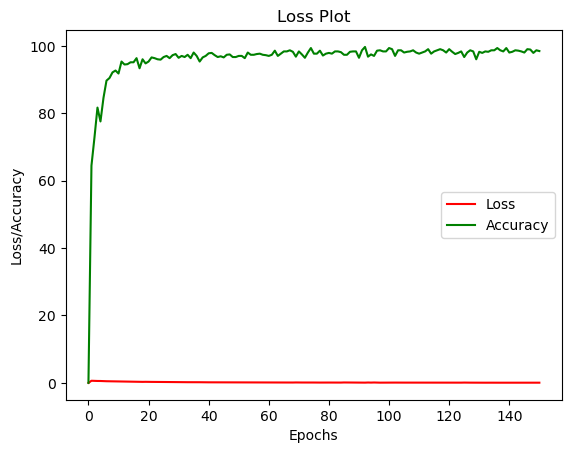

In [22]:
x = range(len(losslist))
plt.plot(x,losslist, label="Loss", color='r')
plt.plot(x,acclist, label="Accuracy", color='g')
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.title("Loss Plot")
plt.legend()
plt.show()

In [27]:
model.eval()
tp,tn,fp,fn=0,0,0,0

for x,y in test_loader:
    if torch.round(torch.sigmoid(loadmodel(x)))==y and y[0][0]==1.:
        tp +=1
    elif torch.round(torch.sigmoid(loadmodel(x)))==y and y[0][0]==0.:
        tn+=1
    elif torch.round(torch.sigmoid(loadmodel(x)))!=y and y[0][0]==1.:
        fn+=1
    elif torch.round(torch.sigmoid(loadmodel(x)))!=y and y[0][0]==0.:
        fp+=1
print([[tp,fp],[fn,tn]])
print('\n---------------------------------\n')
print('Validation accuracy = \t'+str((tp+tn)/(tp+tn+fp+fn)*100)+'%')
import joblib
joblib.dump(scaler, "scaler.pkl")


[[74, 1], [1, 44]]

---------------------------------

Validation accuracy = 	98.33333333333333%


['scaler.pkl']

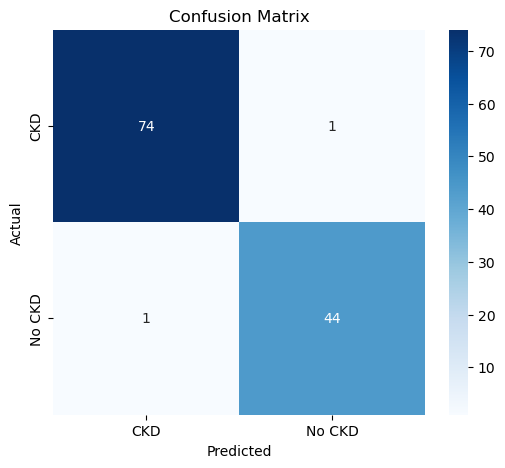

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

conf_matrix = np.array([[tp, fp],
                        [fn, tn]])

labels = ['CKD', 'No CKD']  # [Positive class, Negative class]

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Above we can see from the test data (which is unseen to the model before),
True Positive    =  73,
False Positives  =   0,
False Negatives  =   2,
True Negatives   =  45.

And the valiation accuracy = 98.33%

## Saving and loading our model

Now, we have seen that the accuracy is awesome over both training and test data we will save this model so that we can use it anytime in future. After saving we can easily make a checkpoint at this stage, and run the following cells without initializing again by just loading our saved model!

Now, let us load our existing saved model.

In [26]:
loadmodel = torch.load('model.pth',weights_only=False)
loadmodel.eval()

C:\Users\nairn\AppData\Roaming\Python\Python312\site-packages\torch\serialization.py:1580: SourceChangeWarning: source code of class 'torch.nn.modules.linear.Linear' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
C:\Users\nairn\AppData\Roaming\Python\Python312\site-packages\torch\serialization.py:1580: SourceChangeWarning: source code of class 'torch.nn.modules.activation.ReLU' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
C:\Users\nairn\AppData\Roaming\Python\Python312\site-packages\torch\serialization.py:1580: SourceChangeWarning: source code of class 'torch.nn.modules.dropout.Dropout' has changed. you can retrieve the or

Perceptron(
  (layer_1): Linear(in_features=9, out_features=32, bias=True)
  (layer_2): Linear(in_features=32, out_features=32, bias=True)
  (layer_out): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)